In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ##ploting and visual
import scipy.stats as stat
import numpy as np
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import datetime

%matplotlib inline


In [ ]:
df= pd.read_csv("games.csv")

In [ ]:
##Cleaing up data

In [ ]:
df.drop_duplicates('name',keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)


In [ ]:
#Getting rid of punctuation and making everything lowercase

In [11]:
df.rename(columns={'summary': 's'}, inplace=True)
df['s']=df['s'].str.lower()
df['s'] = df['s'].str.replace(r'[^\w\s]+', '')
print(df['s'])

/var/folders/l8/z5jtbjgx7xg8pwl0g1mdd2fh0000gn/T/ipykernel_3826/3941936916.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['s'] = df['s'].str.replace(r'[^\w\s]+', '')


0        as a young boy link is tricked by ganondorf th...
1        as most major publishers development efforts s...
2        metacritics 2008 ps3 game of the year also kno...
3        this is a tale of souls and swords transcendin...
4        metacritics 2007 wii game of the year the ulti...
                               ...                        
12249    join natalie dylan and alex for an intense adv...
12250    fast  furious showdown takes some of the franc...
12251    drake is out for revenge in a supernatural hon...
12252    head out on a journey of redemption driven by ...
12253    formerly known as the war z it has been 5 year...
Name: s, Length: 12254, dtype: object


In [12]:
null_rows = df[df['s'].isnull()].index

df.drop(index=null_rows, inplace=True)


In [13]:
#Getting rid of stopwords 

In [14]:
#Do word clouds , content based and collab base, topic 

In [15]:
stop_words = stopwords.words('english')
df['s'] = df['s'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(df['s'])

0        young boy link tricked ganondorf king gerudo t...
1        major publishers development efforts shift num...
2        metacritics 2008 ps3 game year also known gta ...
3        tale souls swords transcending world history t...
4        metacritics 2007 wii game year ultimate ninten...
                               ...                        
12249    join natalie dylan alex intense adventure base...
12250    fast furious showdown takes franchises iconic ...
12251    drake revenge supernatural hong kong world you...
12252    head journey redemption driven bittersweet rev...
12253    formerly known war z 5 years since outbreak gi...
Name: s, Length: 12153, dtype: object


In [16]:
Df2 = df.drop(df[df['user_review'] == 'tbd'].index)


In [17]:
##Turning my objects into floats 

In [18]:
Df2["user_review"] = Df2["user_review"].astype(str).astype(float)


In [19]:
Df2["meta_score"] = Df2["meta_score"].astype(str).astype(float)


In [20]:
Df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11182 entries, 0 to 12253
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11182 non-null  object 
 1   platform      11182 non-null  object 
 2   release_date  11182 non-null  object 
 3   s             11182 non-null  object 
 4   meta_score    11182 non-null  float64
 5   user_review   11182 non-null  float64
dtypes: float64(2), object(4)
memory usage: 611.5+ KB


In [21]:
Df2.describe()


,meta_score,user_review
count,11182.000000,11182.000000
mean,71.356108,7.070399
std,12.453150,1.336268
min,20.000000,0.500000
25%,65.000000,6.400000
50%,73.000000,7.400000
75%,80.000000,8.000000
max,99.000000,9.700000


In [22]:
##Getting rid of Dreamcast and Playstation Vita since they are both considered failed consoles 


In [50]:
Df3 = Df2[~Df2.platform.str.contains("Dreamcast")]


In [51]:
Df4 = Df3[~Df3.platform.str.contains("PlayStation Vita")]


In [25]:
Df4

,name,platform,release_date,s,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",young boy link tricked ganondorf king gerudo t...,99.0,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",major publishers development efforts shift num...,98.0,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",metacritics 2008 ps3 game year also known gta ...,98.0,7.7
4,Super Mario Galaxy,Wii,"November 12, 2007",metacritics 2007 wii game year ultimate ninten...,97.0,9.1
5,Super Mario Galaxy 2,Wii,"May 23, 2010",super mario galaxy 2 sequel galaxyhopping orig...,97.0,9.1
...,...,...,...,...,...,...
12249,Charlie's Angels,GameCube,"July 9, 2003",join natalie dylan alex intense adventure base...,23.0,4.3
12250,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",fast furious showdown takes franchises iconic ...,22.0,1.3
12251,Drake of the 99 Dragons,Xbox,"November 3, 2003",drake revenge supernatural hong kong world you...,22.0,1.7
12252,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015",head journey redemption driven bittersweet rev...,21.0,2.9


In [26]:
##Getting rid of games with a 65 or lower 


In [27]:
condition = Df4['meta_score'] > 65


In [28]:
true_index = condition[condition == True].index


In [29]:
Df5 = Df4[condition]


In [30]:
Df5


,name,platform,release_date,s,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",young boy link tricked ganondorf king gerudo t...,99.0,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",major publishers development efforts shift num...,98.0,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",metacritics 2008 ps3 game year also known gta ...,98.0,7.7
4,Super Mario Galaxy,Wii,"November 12, 2007",metacritics 2007 wii game year ultimate ninten...,97.0,9.1
5,Super Mario Galaxy 2,Wii,"May 23, 2010",super mario galaxy 2 sequel galaxyhopping orig...,97.0,9.1
...,...,...,...,...,...,...
8688,AirForce Delta Strike,PlayStation 2,"February 3, 2004",also known airforce delta blue wing knights st...,66.0,7.0
8689,American Conquest: Fight Back,PC,"September 29, 2003",three centuries war continue even frantic comb...,66.0,8.1
8690,Tomb Raider: The Prophecy,Game Boy Advance,"November 12, 2002",tomb raider prophecy delivers full tomb raider...,66.0,8.3
8691,Home Run King,GameCube,"March 18, 2002",first pitch opening day final world series hom...,66.0,7.5


In [31]:
Df5.shape

(7951, 6)

In [32]:
##I got rid of punctuation and made eveything lowercase and got rid of stop words.


In [33]:
##Next time I will start the actual rec system

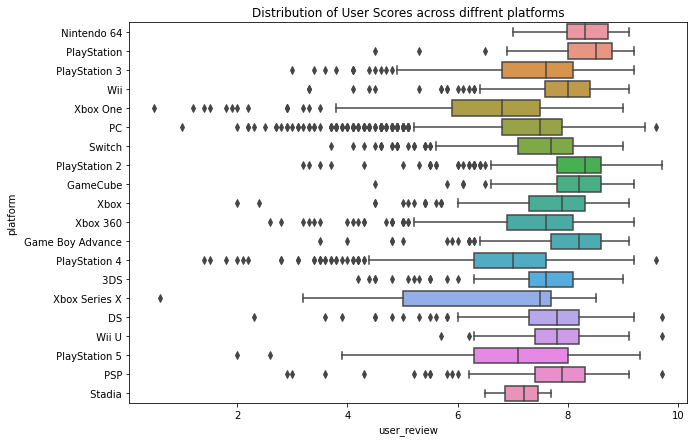

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='user_review',y='platform',data=Df5)
T = plt.title("Distribution of User Scores across diffrent platforms")

In [36]:
gpc = Df5['platform'].value_counts().reset_index()
gpc.columns = ['platform', 'count']
gpc

,platform,count
0,PC,2587
1,PlayStation 4,698
2,Switch,592
3,Xbox 360,583
4,PlayStation 2,556
5,Xbox One,469
6,PlayStation 3,464
7,DS,326
8,Xbox,270
9,Wii,264


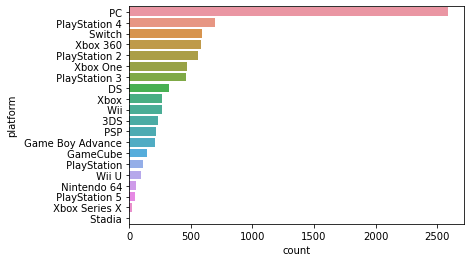

In [37]:
sns.barplot(x = 'count',y = 'platform', data = gpc);

In [46]:
tpur = Df5[['name', 'platform', 'user_review']].sort_values('user_review', ascending = False)[:10]
tpur["user_review"] = tpur["user_review"].apply(pd.to_numeric)
tpur

,name,platform,user_review
3237,GrimGrimoire,PlayStation 2,9.7
1692,Ghost Trick: Phantom Detective,DS,9.7
7174,Tengami,Wii U,9.7
2391,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,9.7
8137,Crystar,PlayStation 4,9.6
7406,Diaries of a Spaceport Janitor,PC,9.6
86,The Witcher 3: Wild Hunt,PC,9.4
1671,Astro's Playroom,PlayStation 5,9.3
200,The Witcher 3: Wild Hunt - Blood and Wine,PC,9.3
1613,Vanquish,Xbox 360,9.2


In [ ]:
tpm = games_df[['name', 'platform', 'meta_score']].sort_values('meta_score', ascending = False)[:10]
tpm

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 8))

ax1.set_title('Top 10 games per Metascore')
ax1.set_xlim(95, 100)
sns.barplot(y = 'name', x = 'meta_score', data = df, ax = ax1, palette = 'flare');

ax2.set_title('Top 10 games per User Review')
ax2.set_xlim(9.3, 9.8)
sns.barplot(y = 'name', x = 'user_review', data = df, ax = ax2, palette = 'crest')

plt.tight_layout(pad = 2)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
#I need to add more graphs and charts next time. My only challenge is what I want to graph and show as of right now.